# 1.) Combining Dataset

In [1]:
import pandas as pd
# Load datasets
df1 = pd.read_csv('OVS.csv')
df2 = pd.read_csv('metasploitable-2.csv')
df3 = pd.read_csv('Normal_data.csv')

# Concatenate datasets along columns axis
concatenated_df = pd.concat([df1, df2,df3], ignore_index=True)

# Save concatenated dataset
concatenated_df.to_csv('concatenated_dataset.csv', index=False)

#### We loaded three separate CSV files containing network traffic data (`OVS.csv`, `metasploitable-2.csv`, and `Normal_data.csv`), concatenated them along the row axis to create a unified dataset, and saved the combined dataset as a new CSV file (`concatenated_dataset.csv`).

# 2.) Dropping Columns from dataset

In [3]:

# Read the CSV file into a DataFrame
df = pd.read_csv("concatenated_dataset.csv")

In [4]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,4045,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
1,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,284,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
2,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,4302,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
3,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,83,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
4,172.17.0.2-200.175.2.130-80-48860-6,200.175.2.130,48860,172.17.0.2,80,6,12/1/2020 1:14,3760,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA


### Feature categorization

In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 79 and they are : 
 ['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byt

In [11]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 5 and they are : 
 ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Label']


In [12]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

Src Port         28273
Dst Port         29695
Protocol             3
Flow Duration    85380
Tot Fwd Pkts       569
                 ...  
Active Min       16183
Idle Mean         5780
Idle Std          8045
Idle Max          4179
Idle Min          7903
Length: 79, dtype: int64

In [14]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])
analyze(df)


343889 rows
** Flow ID:234971 (68%)
** Src IP:122868 (35%)
** Src Port:28273 (8%)
** Dst IP:1081 (0%)
** Dst Port:29695 (8%)
** Protocol:[6:54.68%,0:35.43%,17:9.89%]
** Timestamp:1392 (0%)
** Flow Duration:85380 (24%)
** Tot Fwd Pkts:569 (0%)
** Tot Bwd Pkts:699 (0%)
** TotLen Fwd Pkts:5602 (1%)
** TotLen Bwd Pkts:7585 (2%)
** Fwd Pkt Len Max:2132 (0%)
** Fwd Pkt Len Min:[0:90.5%,34:1.41%,30:1.33%,32:1.13%,33:0.96%,95:0.85%,36:0.52%,40:0.44%,35:0.41%,42:0.26%,38:0.22%,51:0.21%,50:0.19%,37:0.18%,31:0.15%,45:0.14%,39:0.14%,43:0.11%,46:0.09%,174:0.09%,47:0.09%,60:0.08%,48:0.07%,44:0.06%,29:0.06%,49:0.04%,178:0.04%,22:0.04%,41:0.03%,28:0.03%,27:0.02%,137:0.01%,1300:0.01%,2600:0.01%,200:0.0%,52:0.0%,86:0.0%,90:0.0%,65:0.0%,53:0.0%,77:0.0%,83:0.0%,25:0.0%,498:0.0%,55:0.0%,59:0.0%,3900:0.0%,1210:0.0%,161:0.0%,58:0.0%,156:0.0%,247:0.0%,61:0.0%,152:0.0%,23:0.0%,133:0.0%,476:0.0%,207:0.0%,488:0.0%,54:0.0%,509:0.0%,3810:0.0%,519:0.0%,2510:0.0%,154:0.0%,1211:0.0%,327:0.0%,274:0.0%,2521:0.0%,309:0

#### The code analyzes the DataFrame printing the number of rows, and for each column, it either shows the unique values and their percentages (if there are 100 or fewer unique values) or the count of unique values along with the percentage of unique values relative to the total rows (if there are more than 100 unique values).

In [15]:

# Drop the specified columns
columns_to_drop = ['Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp', 'Flow ID',
                   'Fwd PSH Flags', 'Fwd URG Flags', 'CWE Flag Count', 'ECE Flag Cnt',
                   'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 
                   'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg','Init Fwd Win Byts','Fwd Seg Size Min']
df.drop(columns=columns_to_drop, inplace=True)

# Save the modified DataFrame back to a CSV file
df.to_csv("Concatenated_Dataset_before_Balancing.csv", index=False)

#### We inspect irrelevant or unnecessary columns from the dataset to focus on features that are more meaningful for modeling.

# 3.) Checking Distribution of classes, Cleaning, Processing & Balancing the Dataset

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
#!pip install imblearn

In [17]:

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Concatenated_Dataset_before_Balancing.csv")

In [18]:
# Extract unique values in the 'Label' column
original_labels = df['Label'].unique()

# Print the unique labels
for label in original_labels:
    print(label)

BFA
DDoS 
DoS
Probe
Web-Attack
BOTNET
U2R
DDoS
Normal


In [19]:
df["Label"].value_counts()

Label
Probe         98129
DDoS          73529
Normal        68424
DoS           53616
DDoS          48413
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: count, dtype: int64

In [20]:
# Strip leading and trailing whitespace from labels
df['Label'] = df['Label'].str.strip()

df["Label"].value_counts()

Label
DDoS          121942
Probe          98129
Normal         68424
DoS            53616
BFA             1405
Web-Attack       192
BOTNET           164
U2R               17
Name: count, dtype: int64

### a.) Checking Distribution

<Figure size 2000x2000 with 0 Axes>

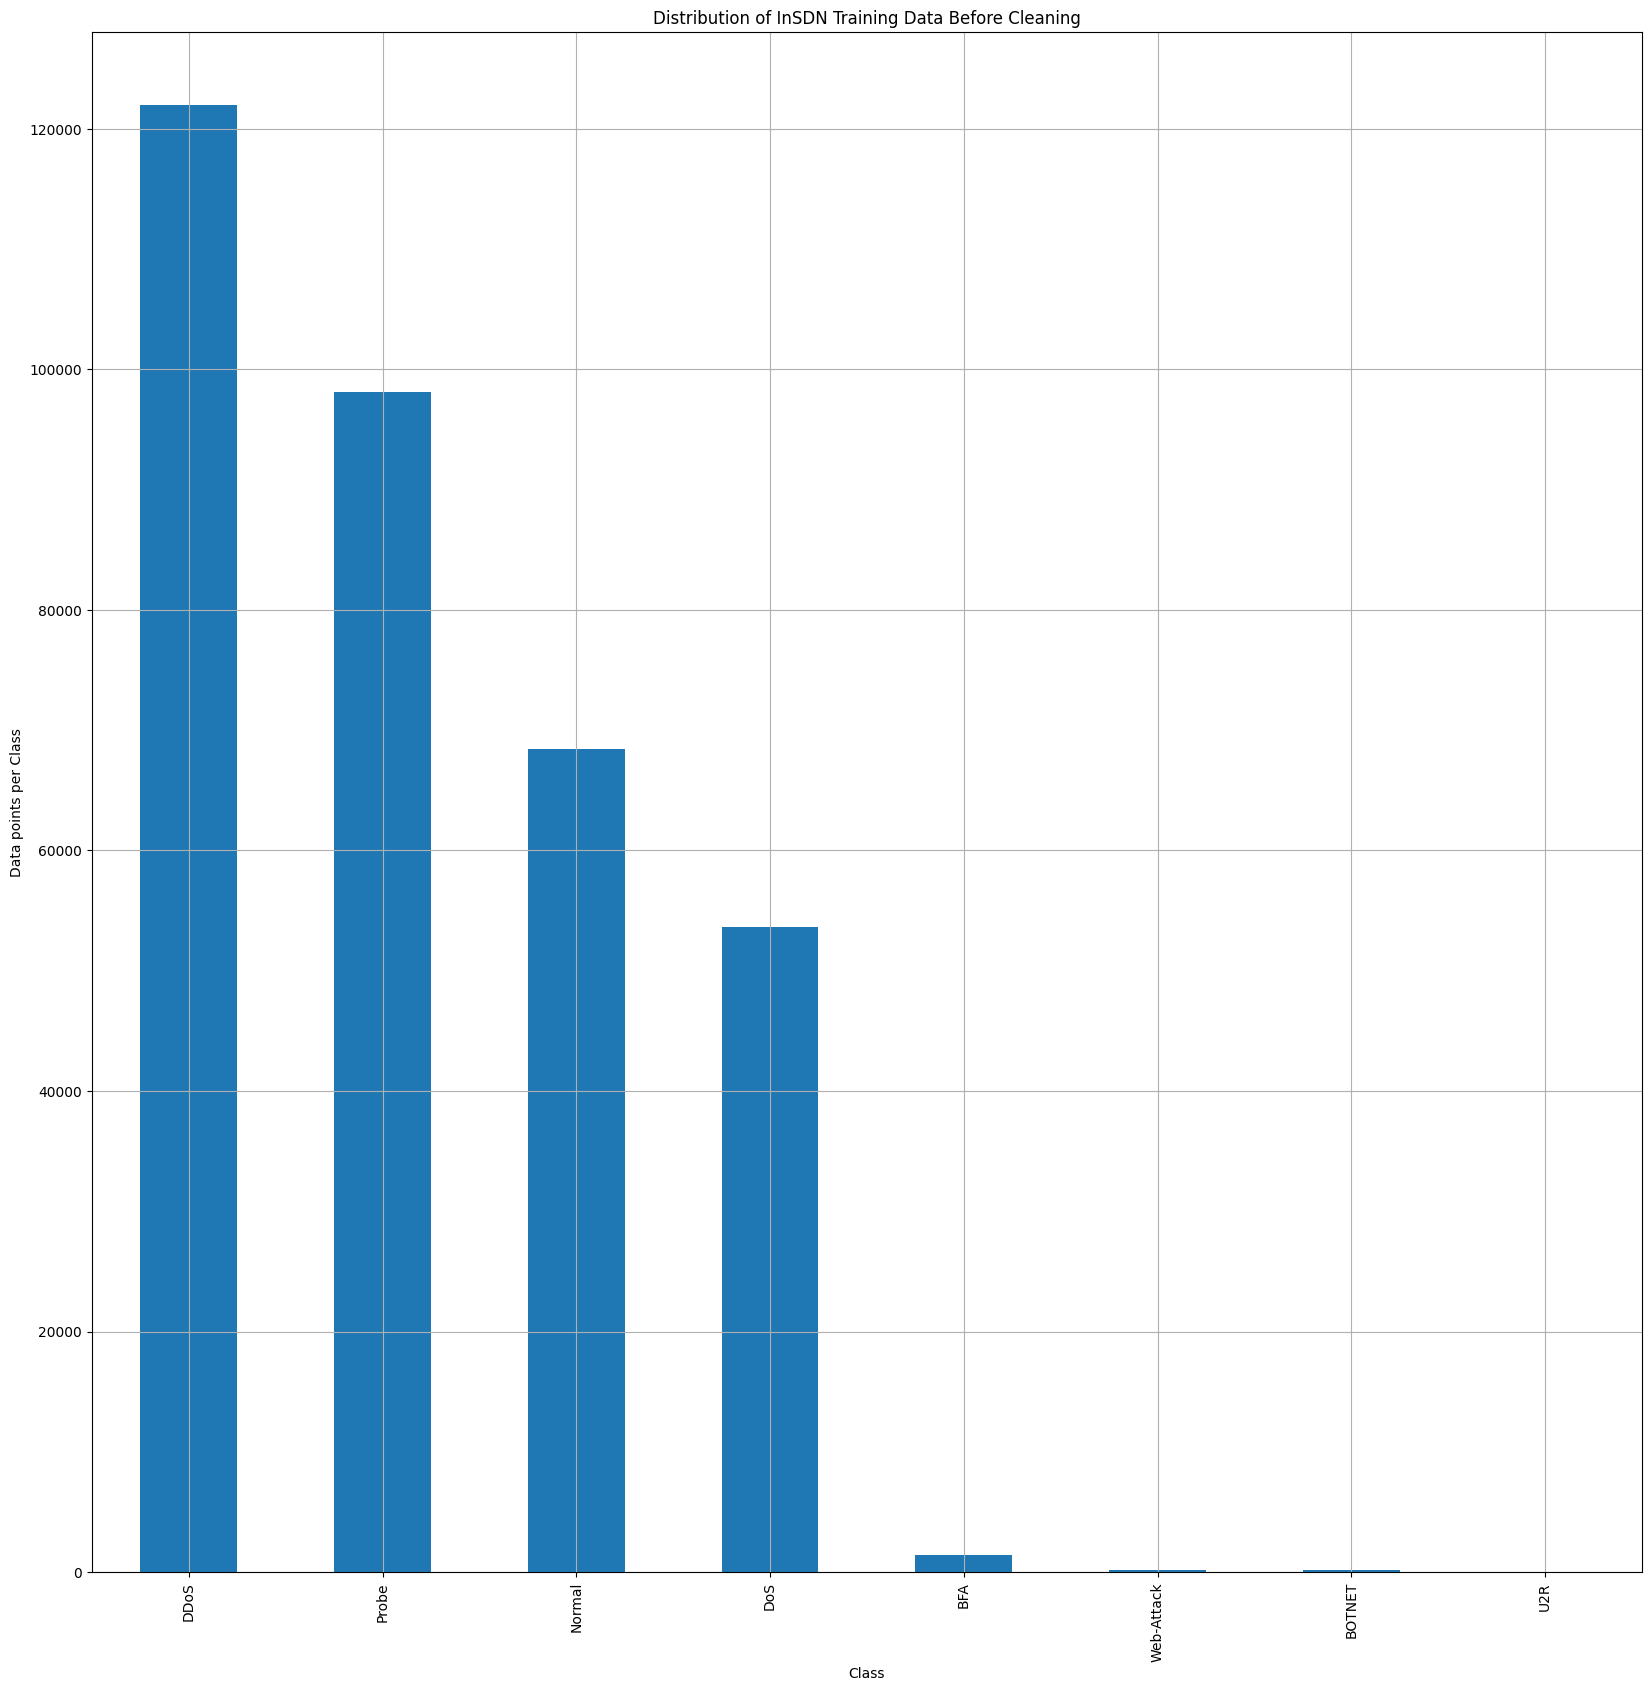

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of InSDN Training Data Before Cleaning')
plt.grid()
plt.show()

#fig.savefig('InSDN_Data_Distribution.pdf') 

In [22]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class DDoS : 121942 ( 35.46 %)
Number of data points in class Probe : 98129 ( 28.535 %)
Number of data points in class Normal : 68424 ( 19.897 %)
Number of data points in class DoS : 53616 ( 15.591 %)
Number of data points in class BFA : 1405 ( 0.409 %)
Number of data points in class Web-Attack : 192 ( 0.056 %)
Number of data points in class BOTNET : 164 ( 0.048 %)
Number of data points in class U2R : 17 ( 0.005 %)


### b.) Cleaning

In [23]:
#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)


In [24]:
data_clean.shape

(343889, 67)

#### No Duplicates Found so the Distribution is still the same

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343889 entries, 0 to 343888
Data columns (total 66 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Protocol           343889 non-null  int64  
 1   Flow Duration      343889 non-null  int64  
 2   Tot Fwd Pkts       343889 non-null  int64  
 3   Tot Bwd Pkts       343889 non-null  int64  
 4   TotLen Fwd Pkts    343889 non-null  float64
 5   TotLen Bwd Pkts    343889 non-null  float64
 6   Fwd Pkt Len Max    343889 non-null  int64  
 7   Fwd Pkt Len Min    343889 non-null  int64  
 8   Fwd Pkt Len Mean   343889 non-null  float64
 9   Fwd Pkt Len Std    343889 non-null  float64
 10  Bwd Pkt Len Max    343889 non-null  int64  
 11  Bwd Pkt Len Min    343889 non-null  int64  
 12  Bwd Pkt Len Mean   343889 non-null  float64
 13  Bwd Pkt Len Std    343889 non-null  float64
 14  Flow Byts/s        343889 non-null  float64
 15  Flow Pkts/s        343889 non-null  float64
 16  Fl

### c.) Processing

In [27]:

# Initialize LabelEncoder
le = preprocessing.LabelEncoder()

for column in df.columns:
    df[column] = df[column].astype(str)  # Convert column to string type
    df[column] = le.fit_transform(df[column])  # Apply LabelEncoder


In [28]:
df.dtypes

Protocol           int32
Flow Duration      int32
Tot Fwd Pkts       int32
Tot Bwd Pkts       int32
TotLen Fwd Pkts    int32
                   ...  
Idle Mean          int32
Idle Std           int32
Idle Max           int32
Idle Min           int32
Label              int32
Length: 66, dtype: object

In [29]:
df['Label'].value_counts()

Label
2    121942
5     98129
4     68424
3     53616
0      1405
7       192
1       164
6        17
Name: count, dtype: int64

In [30]:
data_clean.shape

(343889, 67)

### d.) Balancing The Dataset

In [34]:
from collections import Counter


Desired sample counts for minority classes:
Class 0: 14632
Class 1: 14632
Class 6: 14632
Class 7: 14632

Resampled class distribution:
Counter({2: 97547, 5: 78344, 4: 54201, 3: 42342, 1: 14632, 6: 14632, 7: 14592, 0: 14462})


<Figure size 2000x2000 with 0 Axes>

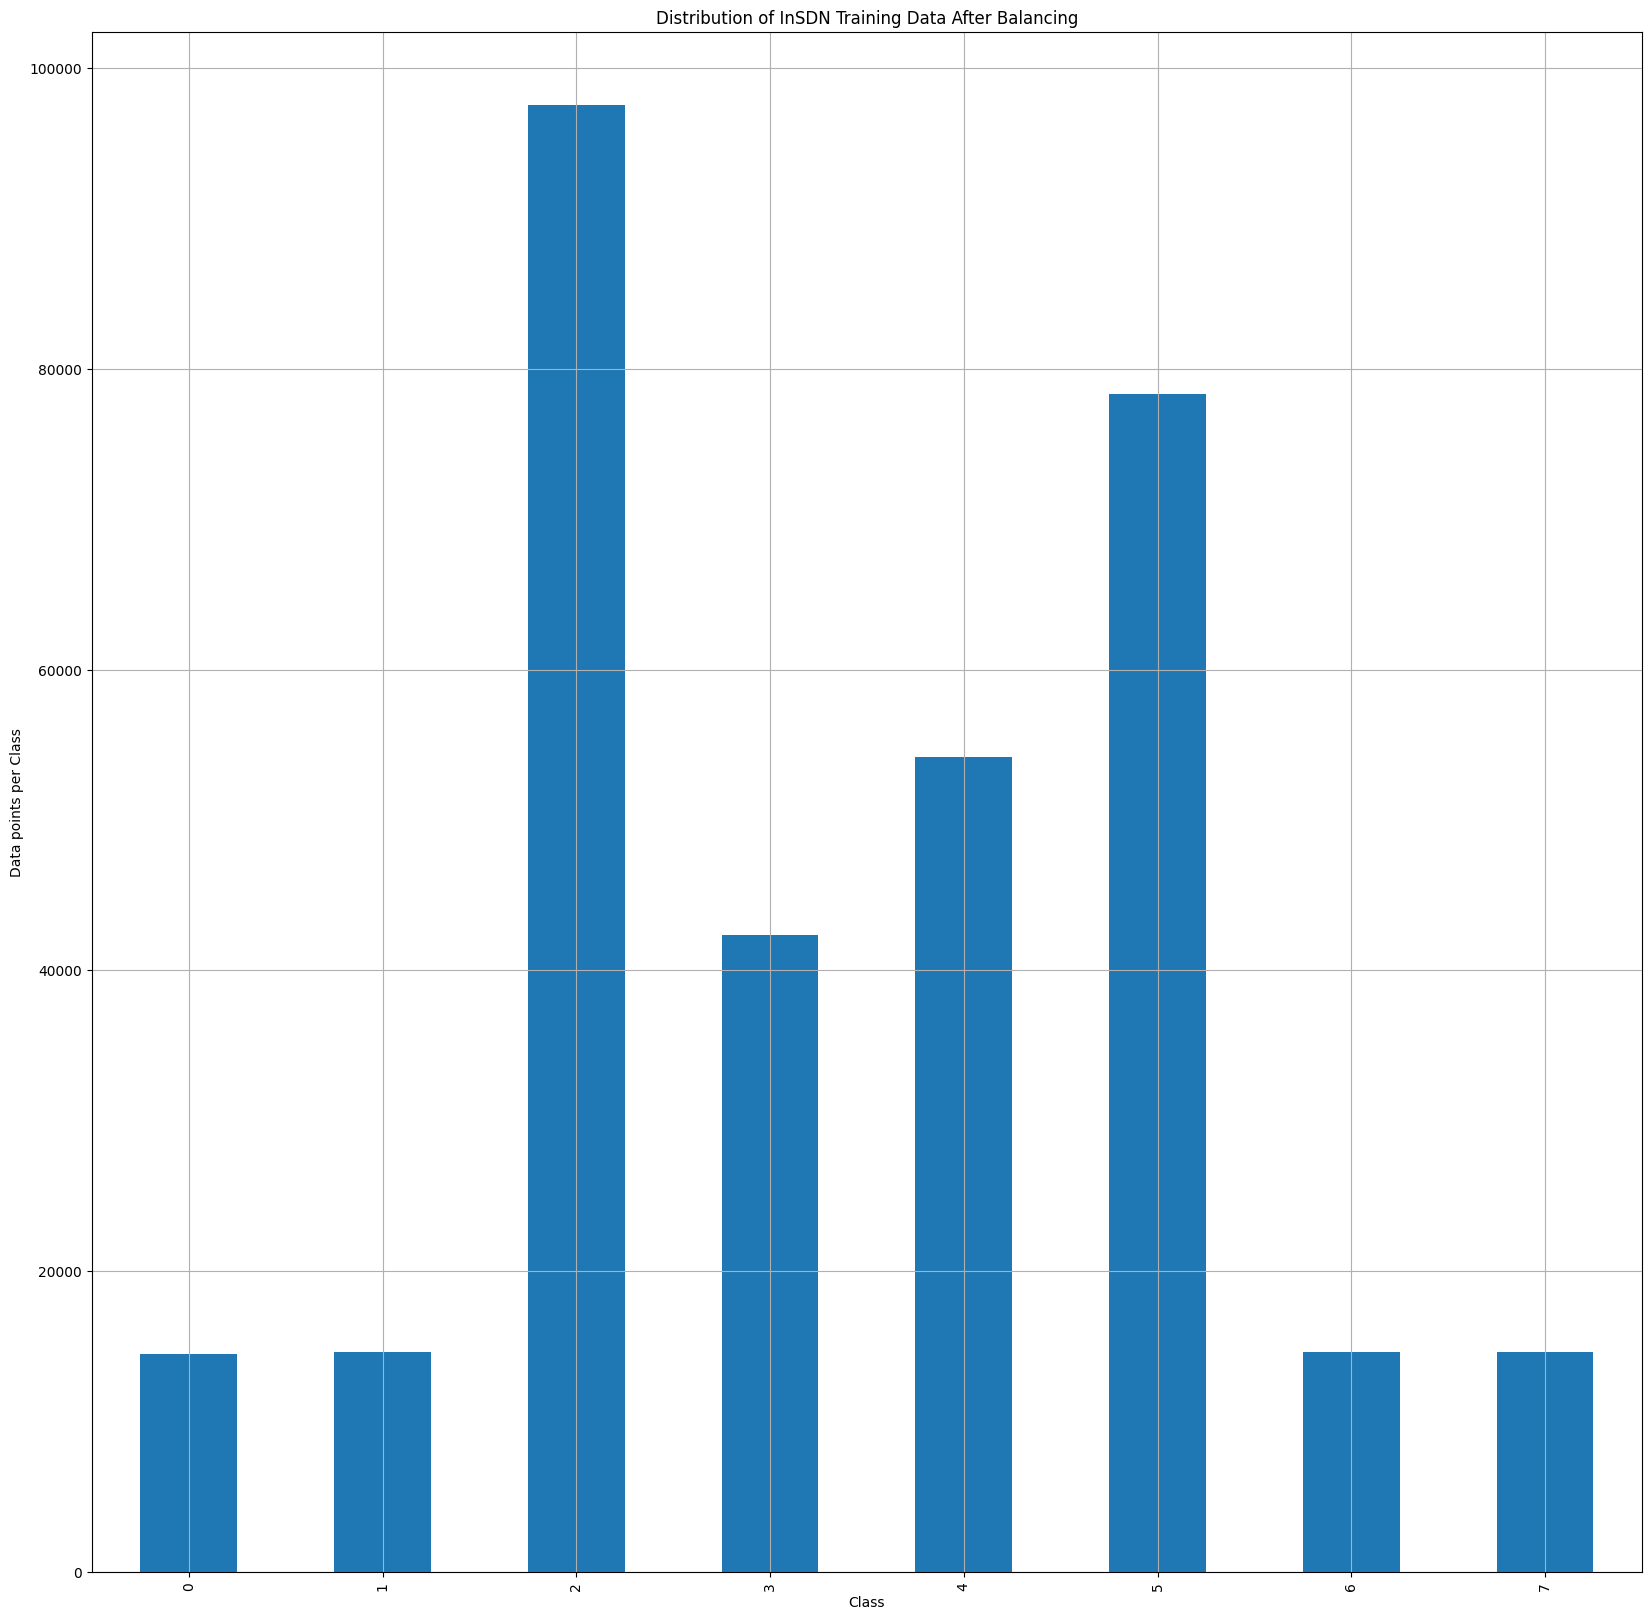

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek

# Split into features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Split into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define desired counts for minority classes (10%-20% of dominant class)
dominant_class = y_train.value_counts().idxmax()
dominant_count = y_train.value_counts().max()


desired_percentage = 0.15
desired_counts = {
    0: int(dominant_count * desired_percentage),  # BFA
    1: int(dominant_count * desired_percentage),  # BOTNET
    6: int(dominant_count * desired_percentage),  # U2R
    7: int(dominant_count * desired_percentage),  # Web-Attack
}

print("\nDesired sample counts for minority classes:")
for cls, count in desired_counts.items():
    print(f"Class {cls}: {count}")

# Initialize SMOTETomek with customized sampling_strategy
smote_tomek = SMOTETomek(
    sampling_strategy=desired_counts,
    random_state=42
)

# Apply SMOTETomek
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Verify resampled class distribution
print("\nResampled class distribution:")
print(Counter(y_resampled))

# Visualize resampled distribution
plt.figure(figsize=(20,20))
fig, ax = plt.subplots(figsize=(20,20))
resampled_distribution = pd.Series(y_resampled).value_counts().sort_index()
resampled_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of InSDN Training Data After Balancing')
plt.grid()
plt.show()
fig.savefig('InSDN_Data_Distribution_after_balancing.pdf') 

In [38]:
# Checking Distibution
sorted_ds = np.argsort(-resampled_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', resampled_distribution.index[i],':', resampled_distribution.values[i], 
          '(', np.round((resampled_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 2 : 97547 ( 28.366 %)
Number of data points in class 5 : 78344 ( 22.782 %)
Number of data points in class 4 : 54201 ( 15.761 %)
Number of data points in class 3 : 42342 ( 12.313 %)
Number of data points in class 1 : 14632 ( 4.255 %)
Number of data points in class 6 : 14632 ( 4.255 %)
Number of data points in class 7 : 14592 ( 4.243 %)
Number of data points in class 0 : 14462 ( 4.205 %)


In [36]:
# Combine the resampled features and labels for the training set
balanced_training_set = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='Label')], axis=1)

# Combine the original testing features and labels for the testing set
original_testing_set = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

# Save the balanced training set to a CSV file
balanced_training_set.to_csv("Balanced_Training_Set.csv", index=False)

# Save the original testing set to a CSV file
original_testing_set.to_csv("Testing_Set.csv", index=False)

print("Balanced training set saved to 'Balanced_Training_Set.csv'.")
print("Testing set saved to 'Testing_Set.csv'.")

Balanced training set saved to 'Balanced_Training_Set.csv'.
Testing set saved to 'Testing_Set.csv'.


#### After balancing the training dataset, we combined the resampled features and labels into a single DataFrame and saved it as `Balanced_Training_Set.csv`, while also combining the original testing features and labels into a separate DataFrame and saving it as `Testing_Set.csv`.

### 4.) Checking Balanced Training Set and Unbalanced Testing set distributions

In [39]:
import pandas as pd
# Read the CSV file into a DataFrame
BD = pd.read_csv("Balanced_Training_Set.csv")
BT = pd.read_csv("Testing_Set.csv")

<Figure size 2000x2000 with 0 Axes>

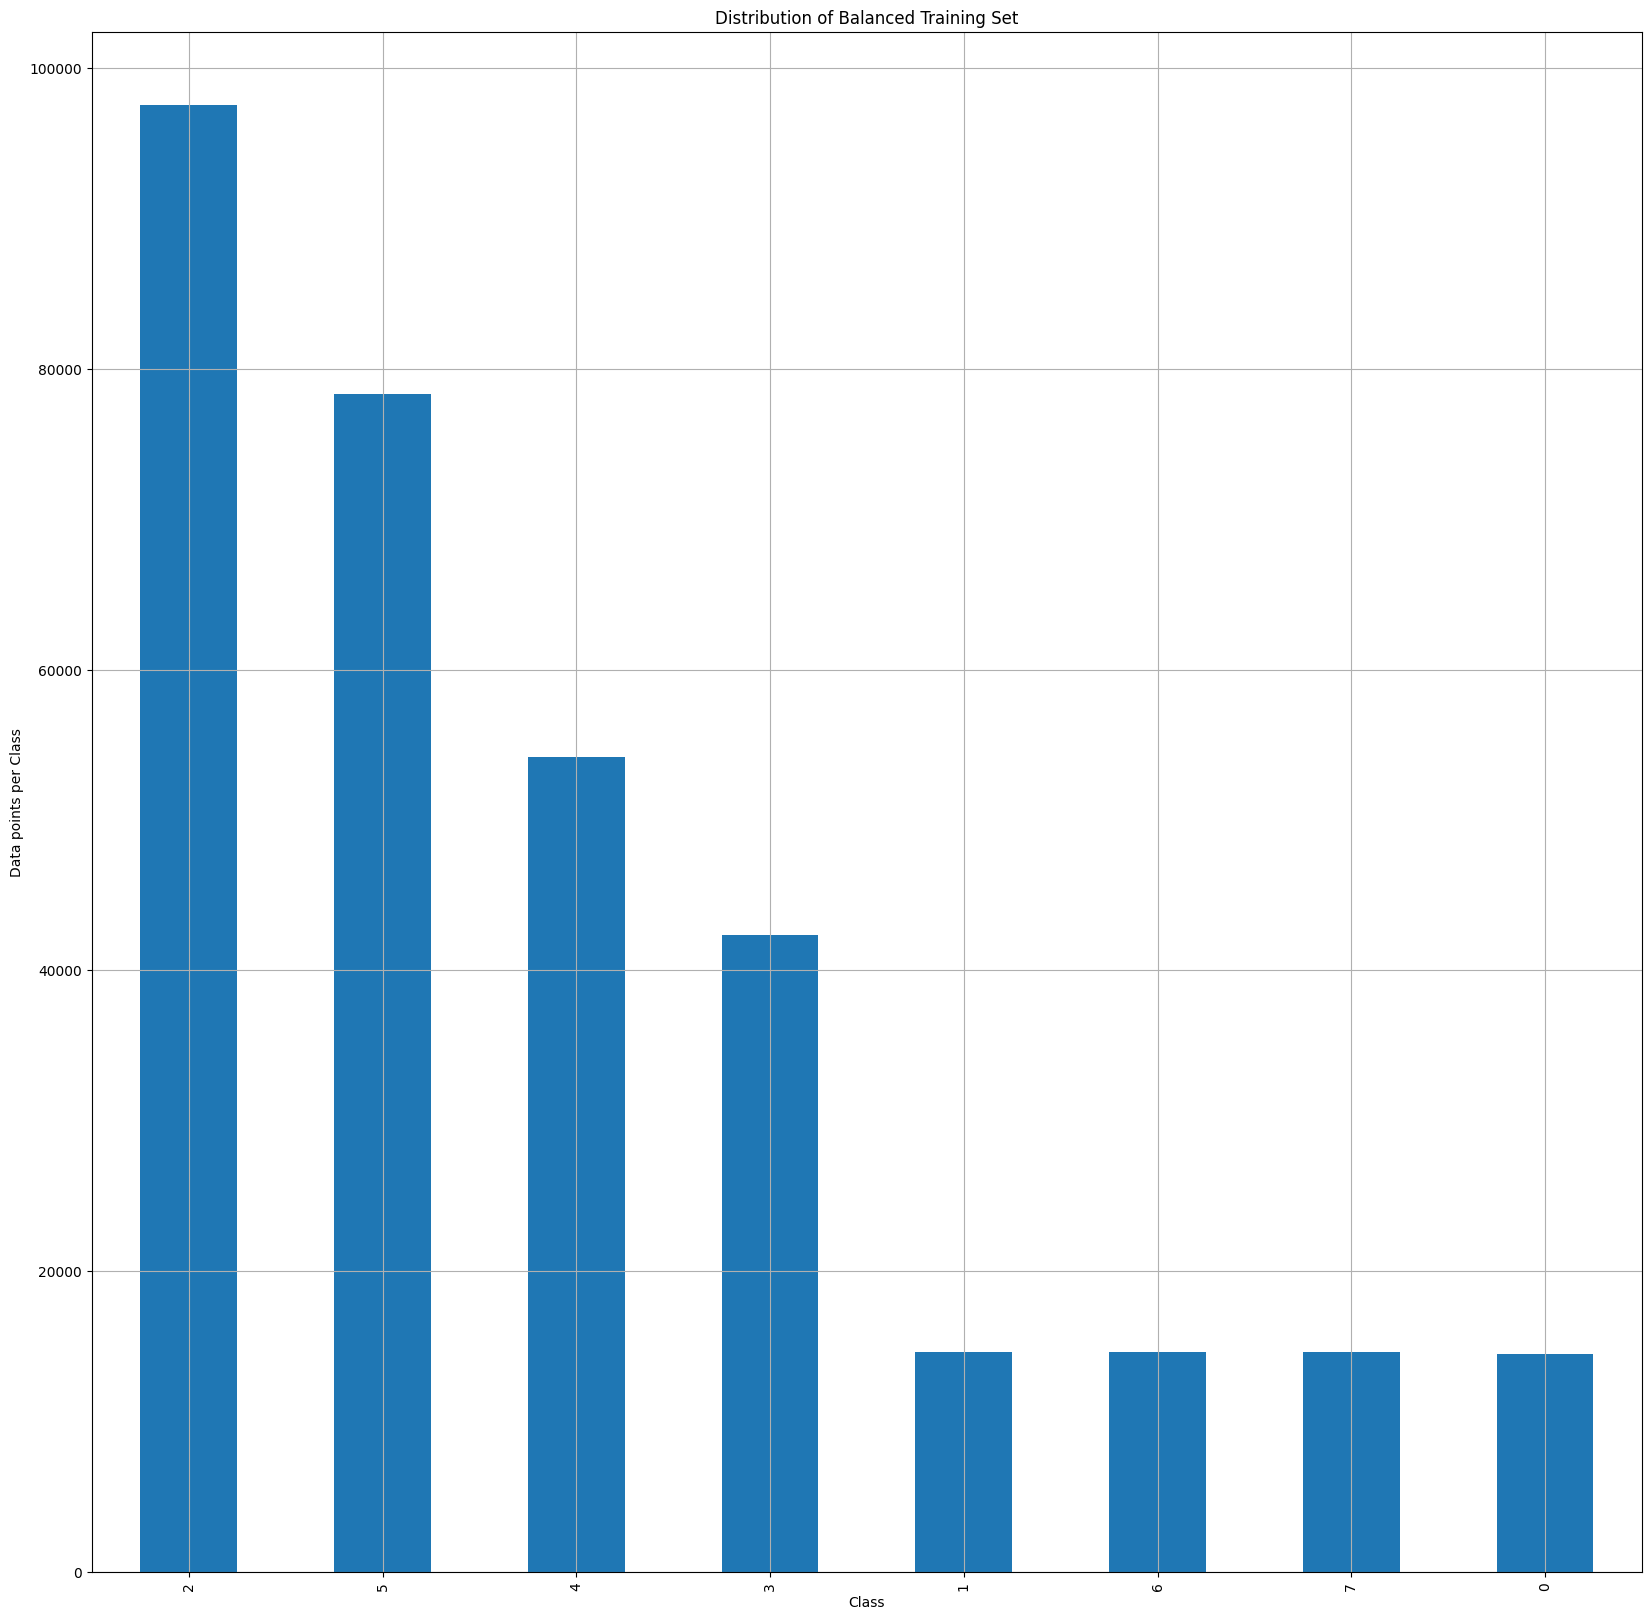

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = BD['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Balanced Training Set')
plt.grid()
plt.show()

#fig.savefig('Balanced Training Set.pdf') 

In [42]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 2 : 97547 ( 28.366 %)
Number of data points in class 5 : 78344 ( 22.782 %)
Number of data points in class 4 : 54201 ( 15.761 %)
Number of data points in class 3 : 42342 ( 12.313 %)
Number of data points in class 1 : 14632 ( 4.255 %)
Number of data points in class 6 : 14632 ( 4.255 %)
Number of data points in class 7 : 14592 ( 4.243 %)
Number of data points in class 0 : 14462 ( 4.205 %)


<Figure size 2000x2000 with 0 Axes>

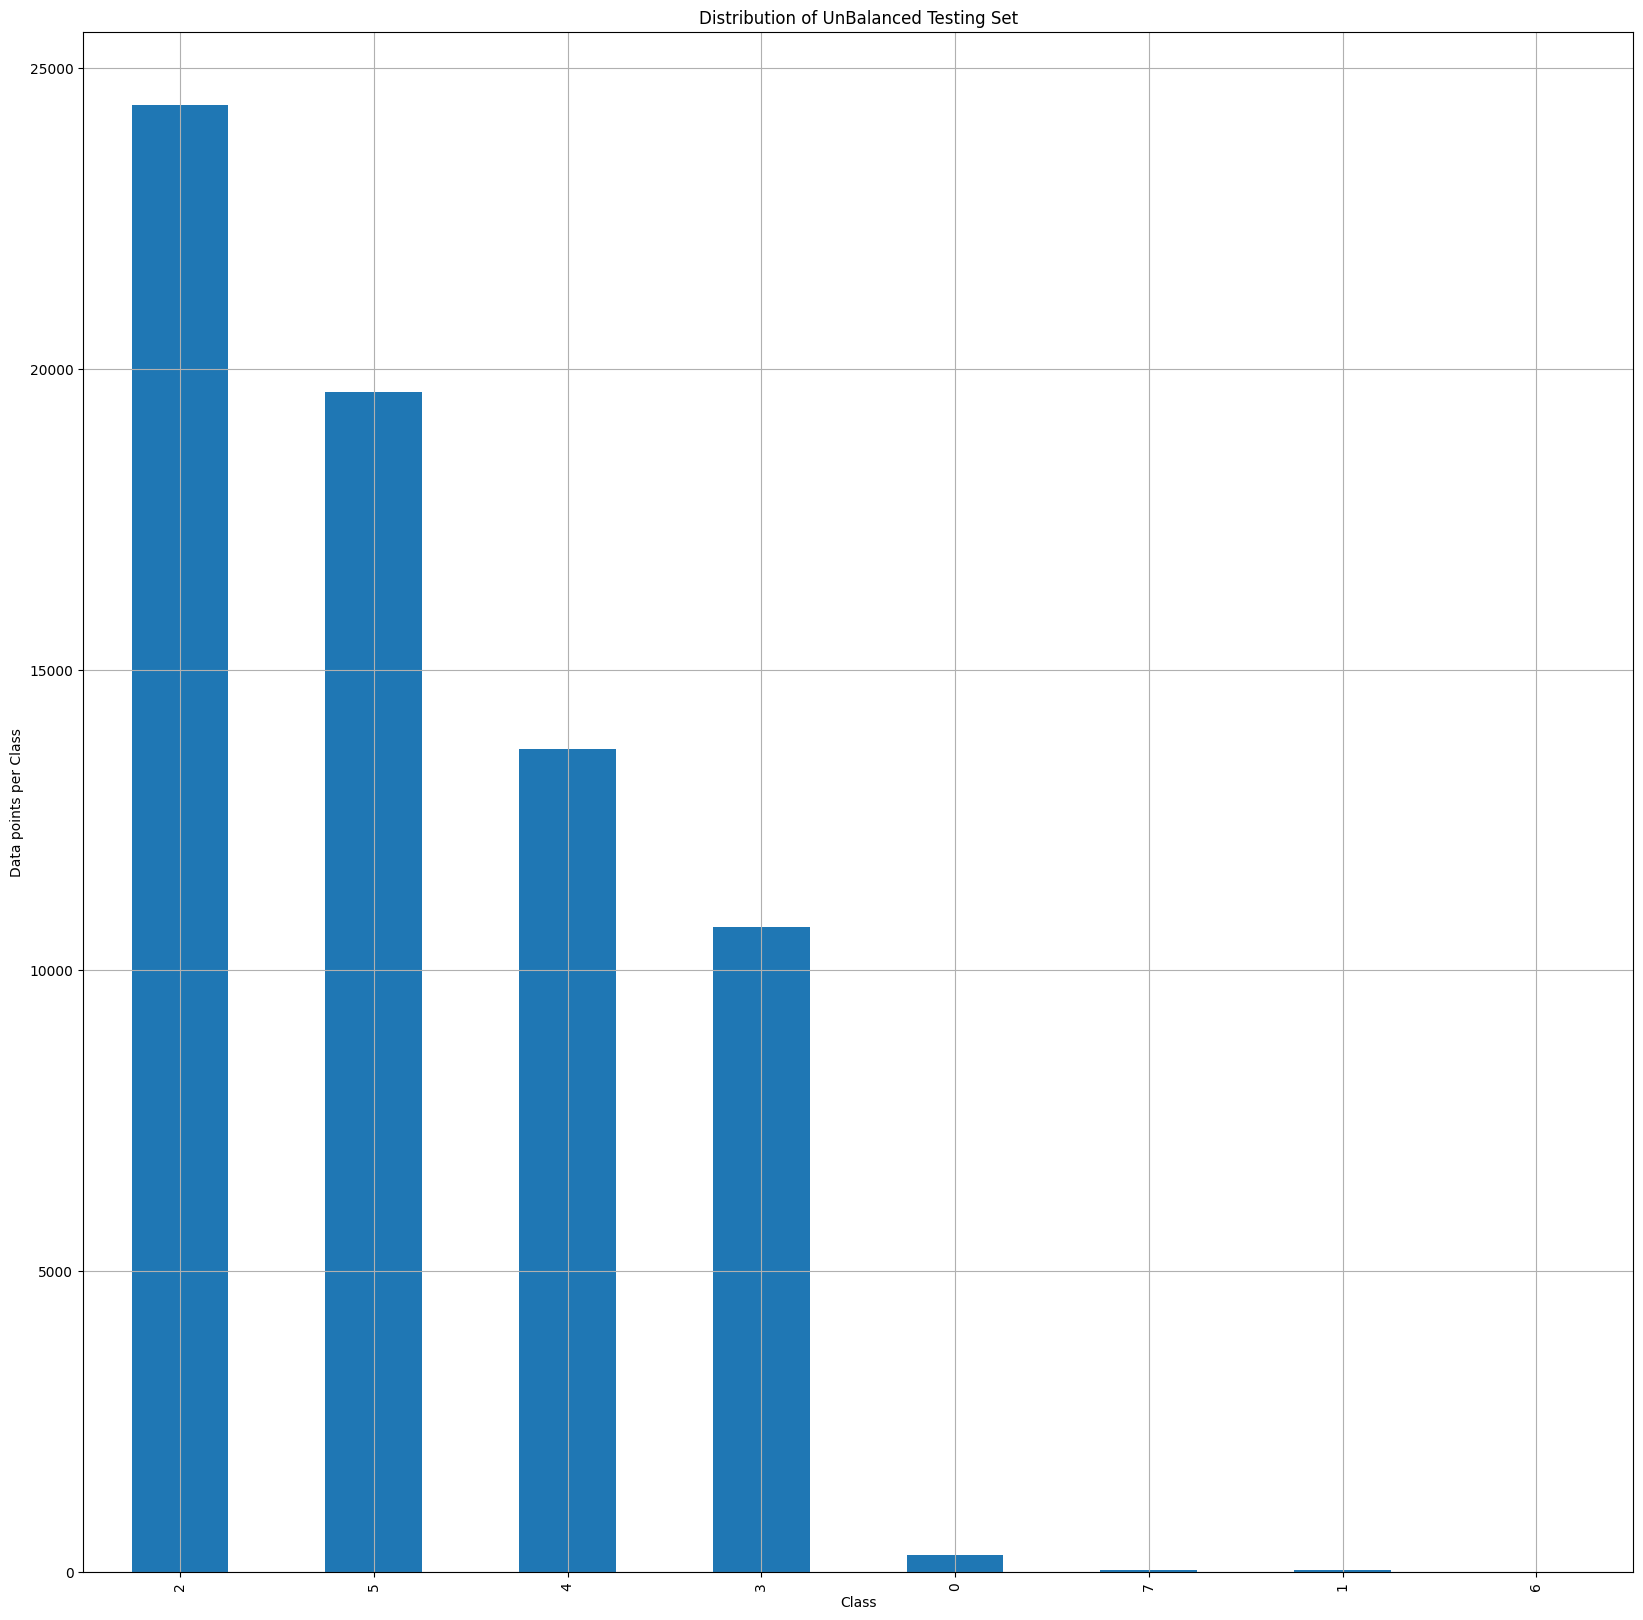

In [43]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))

class_distribution = BT['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of UnBalanced Testing Set')
plt.grid()
plt.show()

#fig.savefig('UnBalanced Testing Set.pdf') 

In [44]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class 2 : 24389 ( 7.092 %)
Number of data points in class 5 : 19626 ( 5.707 %)
Number of data points in class 4 : 13685 ( 3.979 %)
Number of data points in class 3 : 10723 ( 3.118 %)
Number of data points in class 0 : 281 ( 0.082 %)
Number of data points in class 7 : 38 ( 0.011 %)
Number of data points in class 1 : 33 ( 0.01 %)
Number of data points in class 6 : 3 ( 0.001 %)


# 5.) Begin Modeling with the New Datasets We Created

### a.) Importing all Libraries & Modules

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
import xgboost as xgb


from matplotlib.pyplot import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold

### b.) Loading and Scaling the Dataset

In [45]:
# Load the balanced training set and testing set
train_resampled = pd.read_csv("Balanced_Training_Set.csv")
test_set = pd.read_csv("Testing_Set.csv")

# Separate features (X) and labels (y) for the training set
X_train = train_resampled.drop('Label', axis=1)
y_train = train_resampled['Label']

# Separate features (X) and labels (y) for the testing set
X_test = test_set.drop('Label', axis=1)
y_test = test_set['Label']

# Initialize the scaler
ms = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing features
X_train_scaled = ms.fit_transform(X_train)
X_test_scaled = ms.transform(X_test)



#### We load the balanced training dataset and the separate testing dataset, then separate features and labels, and apply MinMax scaling to normalize the features, we eliminate the need for classic splitting when modeling since the datasets are already pre-split.

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
rfc.fit(X_train, y_train)
y_pred_probs = rfc.predict_proba(X_test)
y_pred5 = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred5, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred5, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred5, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[  235     0     0     0     0    44     1     1]
 [    1    32     0     0     0     0     0     0]
 [    0     0 24386     0     1     2     0     0]
 [    3     0     0 10709     2     5     0     4]
 [    1     1     0     1 13674     8     0     0]
 [   98     0     1     7     6 19513     0     1]
 [    0     0     0     0     0     0     3     0]
 [    2     0     0     0     0     0     0    36]]
Accuracy: 0.9972374887318619
Precision: 0.9079445691745958
Recall: 0.9681717804882495
F1 Score: 0.9346820925952679


Confusion Matrix:
 [[  235     0     0     0     0    44     1     1]
 [    1    32     0     0     0     0     0     0]
 [    0     0 24386     0     1     2     0     0]
 [    3     0     0 10709     2     5     0     4]
 [    1     1     0     1 13674     8     0     0]
 [   98     0     1     7     6 19513     0     1]
 [    0     0     0     0     0     0     3     0]
 [    2     0     0     0     0     0     0    36]]


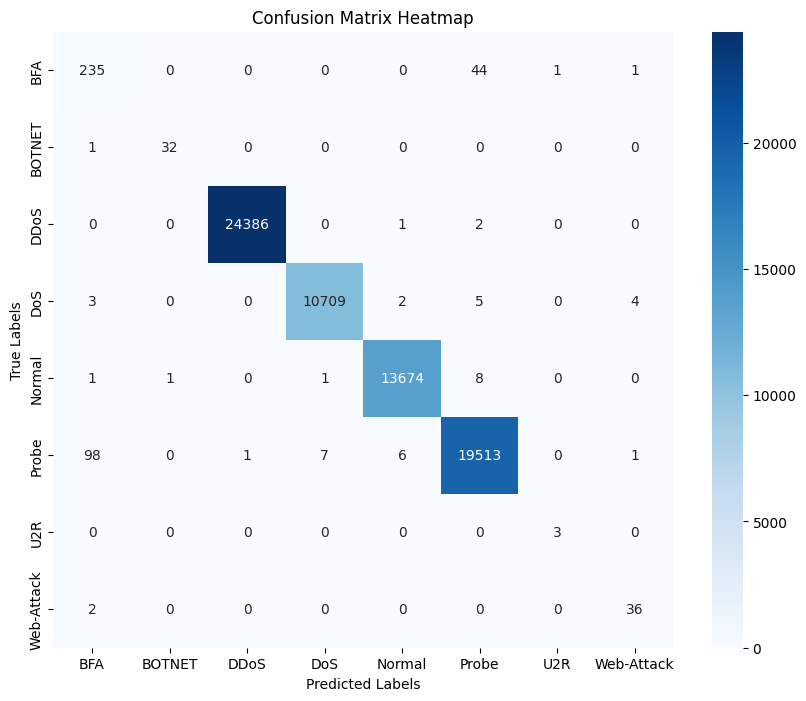

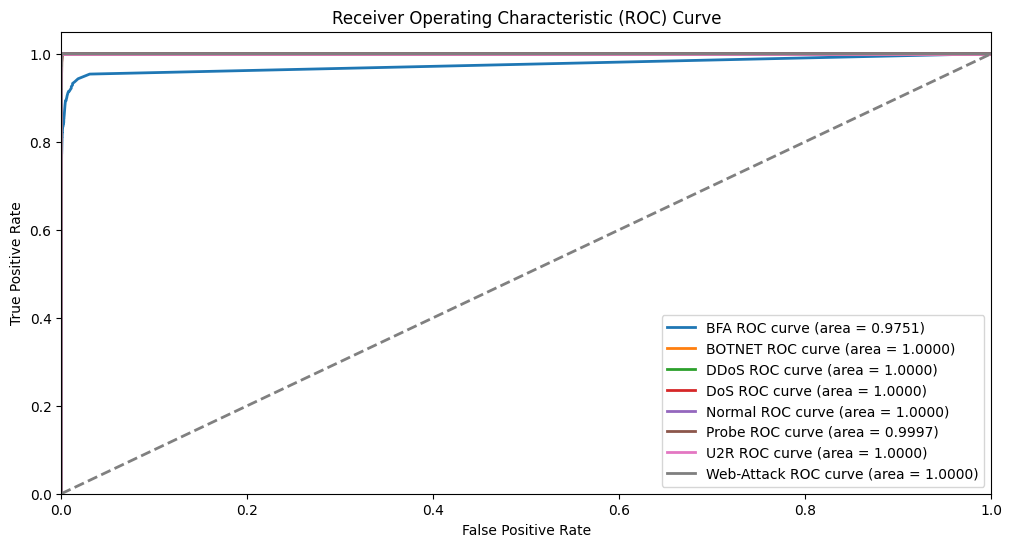

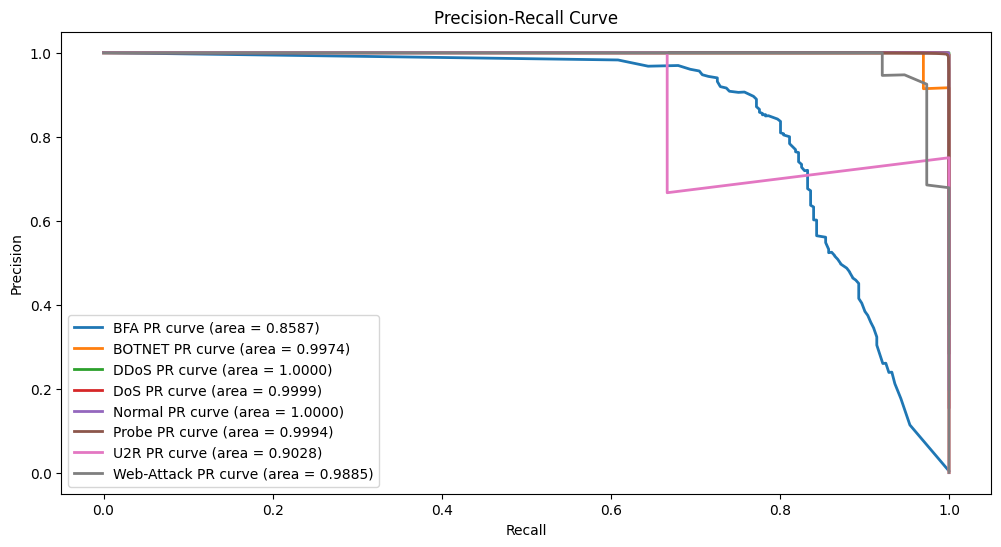

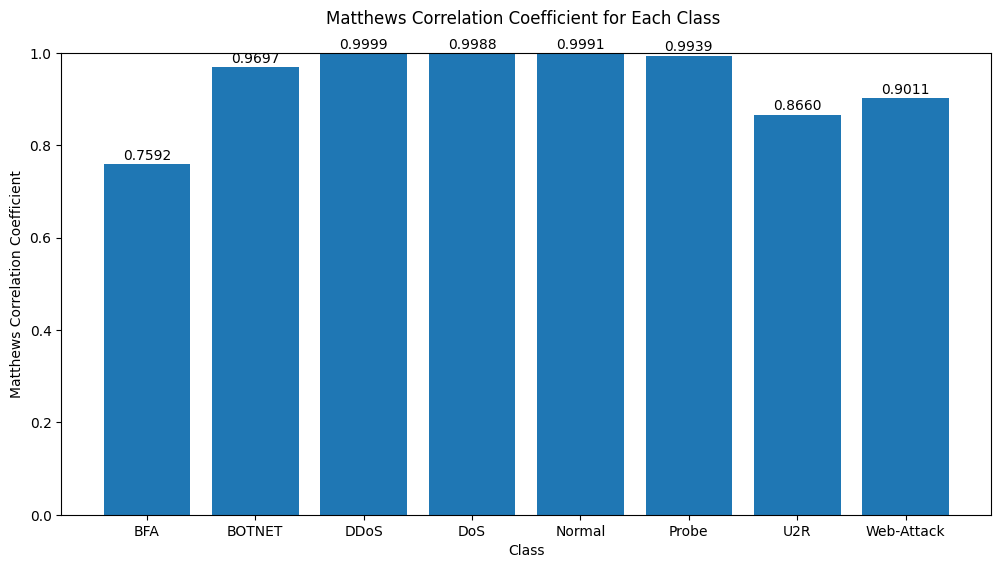


Classification Report:

              precision    recall  f1-score   support

         BFA     0.6912    0.8363    0.7568       281
      BOTNET     0.9697    0.9697    0.9697        33
        DDoS     1.0000    0.9999    0.9999     24389
         DoS     0.9993    0.9987    0.9990     10723
      Normal     0.9993    0.9992    0.9993     13685
       Probe     0.9970    0.9942    0.9956     19626
         U2R     0.7500    1.0000    0.8571         3
  Web-Attack     0.8571    0.9474    0.9000        38

    accuracy                         0.9972     68778
   macro avg     0.9079    0.9682    0.9347     68778
weighted avg     0.9975    0.9972    0.9973     68778



In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, matthews_corrcoef, classification_report
from sklearn.preprocessing import label_binarize

# Class mapping
class_mapping = {
    0: 'BFA',
    1: 'BOTNET',
    2: 'DDoS',
    3: 'DoS',
    4: 'Normal',
    5: 'Probe',
    6: 'U2R',
    7: 'Web-Attack'
}

# Get the class names in order
class_names = [class_mapping[i] for i in range(len(class_mapping))]

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:\n", conf_matrix)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
print('\n')
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_binarized = label_binarize(y_pred5, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot ROC curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print('\n')
# Plot Precision-Recall curve for each class
plt.figure(figsize=(12, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'{class_names[i]} PR curve (area = {pr_auc[i]:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
print('\n')
# Compute MCC for each class
mcc_values = [matthews_corrcoef(y_test_binarized[:, i], y_pred_binarized[:, i]) for i in range(n_classes)]

# Plot MCC values for each class
plt.figure(figsize=(12, 6))
plt.bar(range(n_classes), mcc_values, tick_label=class_names)
plt.title('Matthews Correlation Coefficient for Each Class \n')
plt.xlabel('Class')
plt.ylabel('Matthews Correlation Coefficient')
print('\n')
plt.ylim([0, 1])
for i, v in enumerate(mcc_values):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

# Print classification report with precision, recall, and F1-score up to 4 decimal places
print("\nClassification Report:\n")
y_true = [class_mapping[label] for label in y_test]
y_pred_labels = [class_mapping[label] for label in y_pred5]

report = classification_report(y_true, y_pred_labels, target_names=class_names, digits=4)
print(report)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2)
rfc.fit(X_train_scaled, y_train)
y_pred_probs = rfc.predict_proba(X_test_scaled)
y_pred5 = np.argmax(y_pred_probs, axis=1)

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred5))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

# Print precision
precision = precision_score(y_test, y_pred5, average='macro')
print("Precision:", precision)

# Print recall
recall = recall_score(y_test, y_pred5, average='macro')
print("Recall:", recall)

# Print F1 score
f1 = f1_score(y_test, y_pred5, average='macro')
print("F1 Score:", f1)

Confusion Matrix:
 [[  235     0     0     0     0    44     1     1]
 [    1    32     0     0     0     0     0     0]
 [    0     0 24386     0     1     2     0     0]
 [    3     0     0 10709     2     5     0     4]
 [    1     1     0     1 13674     8     0     0]
 [   99     0     1     7     6 19512     0     1]
 [    0     0     0     0     0     0     3     0]
 [    2     0     0     0     0     0     0    36]]
Accuracy: 0.9972229491988718
Precision: 0.9076911861120468
Recall: 0.9681654113860381
F1 Score: 0.9345267907478794


### c.) Model Building

#### Initialized instances of several machine learning classifiers from scikit-learn and other libraries

In [63]:
# Instantiate classifiers
#svc_sigmoid = SVC(kernel='sigmoid', gamma=1.0)
#svc_linear = SVC(kernel='linear')
mnb = MultinomialNB()
gnb = GaussianNB()
knc = KNeighborsClassifier(n_neighbors=8)
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

# Create the dictionary of classifiers
clfs = {
    #'SVC_Sigmoid': svc_sigmoid,
    #'SVC_Linear': svc_linear,
    'GB': gnb,
    'MB': mnb,
    'KN': knc,
    'NB': bnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [64]:
# Define lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
error_rates = []

# Loop over classifiers
for name, clf in clfs.items():
    # Fit the classifier to the training data
    clf.fit(X_train_scaled, y_train)

    # Predict labels on the training set
    y_train_pred = clf.predict(X_train_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_train, y_train_pred)

    # Precision, recall, and f1 score with average='macro'  for multiclass
    precision = precision_score(y_train, y_train_pred, average='macro')
    recall = recall_score(y_train, y_train_pred, average='macro')
    f1 = f1_score(y_train, y_train_pred, average='macro')

    # Confusion matrix
    confusion = confusion_matrix(y_train, y_train_pred)


    # Calculate error rate
    error_rate = np.sum(y_train_pred != y_train) / len(y_train)


    # Print metrics
    print("For", name)
    # Print confusion matrix
    print("Confusion Matrix:\n", confusion)
    print("Training Accuracy:", accuracy)
    print("Training Precision:", precision)
    print("Training Recall:", recall)
    print("Training F1 Score:", f1)
    print("Error Rate:", error_rate)
    print()

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    error_rates.append(error_rate)

For GB
Confusion Matrix:
 [[ 7006     0     0     0     0     0   183  7273]
 [    0 14632     0     0     0     0     0     0]
 [   57     0 97140     0   280     0    70     0]
 [ 9577     0     0  6692  1670   166  2718 21519]
 [ 3766     0     0  2546 32359    27 10934  4569]
 [56168     0     4   100    56 17373  4583    60]
 [  414  1148     0     0    76     0 12875   119]
 [  771     0     0     0    84     0    23 13714]]
Training Accuracy: 0.6100975957817337
Training Precision: 0.6700822954091472
Training Recall: 0.659604759471127
Training F1 Score: 0.5582252496395147
Error Rate: 0.3899024042182663

For MB
Confusion Matrix:
 [[ 2164  1147     0  5467     5  1441  1432  2806]
 [    0 14478     0     0     0     0   154     0]
 [    0     0 97138     2   252   155     0     0]
 [  135    89     0 30069  1956  2771  3641  3681]
 [  377  1297     4  6649 37962  2080  5512   320]
 [    0    24   233   110    72 68428  9476     1]
 [    0     0     0   778  1459     0 12395     0]


C:\Users\queen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For DT
Confusion Matrix:
 [[    0     0     0 10459     1  2359  1643     0]
 [    0  7092     0     0     0     0  7540     0]
 [    0     0 97145   187   212     3     0     0]
 [    0     0     0 37361   228   266  4487     0]
 [    0     0     1  1046 50588   145  2421     0]
 [    0     0     2   161    20 78109    52     0]
 [    0     0     0  3272    99     0 11261     0]
 [    0     0     0  7452     0   363  6777     0]]
Training Accuracy: 0.8512601586687306
Training Precision: 0.6129000842850997
Training Recall: 0.6328610410979169
Training F1 Score: 0.5977575861174131
Error Rate: 0.14873984133126936

For LR
Confusion Matrix:
 [[ 8356   529     6  1436   434  2285     8  1408]
 [    0 14632     0     0     0     0     0     0]
 [    0     0 97544     0     1     2     0     0]
 [  539     6     2 40019  1112   394   130   140]
 [  170    82    39  1706 49871  2074   170    89]
 [   90     1     9    85   134 77987     7    31]
 [    0     0     0     0    69     0 14563     0

C:\Users\queen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\queen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For AdaBoost
Confusion Matrix:
 [[    0     0     0     0     0 14462     0     0]
 [    0     0     0     0     0 14632     0     0]
 [    0     0     0     0 97547     0     0     0]
 [    0     0     0     0   192 42150     0     0]
 [    0     0  5272     0 29275 19654     0     0]
 [    0     0    18     0    33 78293     0     0]
 [    0     0    18     0   110 14504     0     0]
 [    0     0     0     0     0 14592     0     0]]
Training Accuracy: 0.32522252321981426
Training Precision: 0.07813425785390567
Training Recall: 0.1924335263508151
Training F1 Score: 0.11111107245252205
Error Rate: 0.6747774767801857

For BgC
Confusion Matrix:
 [[14426     0     0     0     0    36     0     0]
 [    0 14632     0     0     0     0     0     0]
 [    0     0 97547     0     0     0     0     0]
 [    0     0     0 42341     0     1     0     0]
 [    0     0     0     0 54200     1     0     0]
 [   19     0     0     0     0 78325     0     0]
 [    0     0     0     0     0     0 14

In [65]:
Training_performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Training Accuracy': accuracy_scores,
    'Training Precision': precision_scores,
    'Training Recall': recall_scores,
    'Training F1 Score': f1_scores,
    'Error Rates': error_rates
}).sort_values('Training Recall', ascending=False)
Training_performance_df

,Algorithm,Training Accuracy,Training Precision,Training Recall,Training F1 Score,Error Rates
9,ETC,0.999849,0.999721,0.999779,0.999750,0.000151
8,BgC,0.999828,0.999775,0.999653,0.999714,0.000172
6,RF,0.999828,0.999789,0.999639,0.999714,0.000172
2,KN,0.995060,0.990647,0.993422,0.992014,0.004940
11,xgb,0.996435,0.997264,0.990750,0.993870,0.003565
10,GBDT,0.990643,0.991595,0.978728,0.984559,0.009357
5,LR,0.956466,0.942820,0.918843,0.926123,0.043534
1,MB,0.812134,0.722439,0.709485,0.671614,0.187866
0,GB,0.610098,0.670082,0.659605,0.558225,0.389902
4,DT,0.851260,0.612900,0.632861,0.597758,0.148740


#### The train_classifier function a reusable piece of code that simplifies the process of training a classifier, making predictions on test data, and calculating accuracy and precision scores

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def train_classifier(clf, X_train_scaled, y_train, X_test_scaled, y_test):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    # Print metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Use macro averaging for multiclass precision, recall, and f1-score
    precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    # Calculate confusion matrix
    confusion = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", confusion)

    # Calculate error rate (same for multiclass)
    error_rate = np.sum(y_pred != y_test) / len(y_test)
    print("Error Rate:", error_rate)

    # Return metrics
    return (
        accuracy_score(y_test, y_pred),
        precision,
        recall,
        f1,
        error_rate,
        confusion_matrix(y_test, y_pred)
    )


In [67]:
# Define lists to store metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
bh_values = []
error_rates = []


for name, clf in clfs.items():
    current_accuracy, current_precision, current_recall, current_f1, current_error_rate , current_matrix = train_classifier(clf, X_train_scaled, y_train, X_test_scaled, y_test)

    print("For ", name)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)
    error_rates.append(current_error_rate)

Accuracy: 0.5604262991072727
Precision: 0.5802044258804486
Recall: 0.6295122776454418
F1 Score: 0.4199492134046702
Confusion Matrix:
 [[  145     0     0     0     1     0     1   134]
 [    0    33     0     0     0     0     0     0]
 [   12     0 24279     0    75     0    23     0]
 [ 2379     0     0  1617   442    45   665  5575]
 [  950     0     0   658  8083     4  2722  1268]
 [14099     0     1    28    23  4352  1105    18]
 [    0     0     0     0     0     0     2     1]
 [    3     0     0     0     1     0     0    34]]
Error Rate: 0.43957370089272735
For  GB
Accuracy: 0.8529326238041234
Precision: 0.4963869648523922
Recall: 0.6658178772648469
F1 Score: 0.4731523437085102
Confusion Matrix:
 [[   42    24     0   100     1    38    23    53]
 [    0    32     0     0     0     0     1     0]
 [    0     0 24280     0    67    42     0     0]
 [   36    20     0  7652   528   736   870   881]
 [  110   337     1  1786  9529   513  1314    95]
 [    0     6    53    28   

C:\Users\queen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.39265462793335076
Precision: 0.7228631053328525
Recall: 0.19244828233155475
F1 Score: 0.12936008461173001
Confusion Matrix:
 [[    0     0     1     0     0   280     0     0]
 [    0     0     0     0     0    33     0     0]
 [    0     0     0     0 24389     0     0     0]
 [    0     0     0     0    63 10660     0     0]
 [    0     0  1310     0  7394  4981     0     0]
 [    0     0     5     0     9 19612     0     0]
 [    0     0     0     0     0     3     0     0]
 [    0     0     0     0     0    38     0     0]]
Error Rate: 0.6073453720666492
For  AdaBoost
Accuracy: 0.9973247259298031
Precision: 0.8936979047044357
Recall: 0.9794271205659955
F1 Score: 0.9253765378543708
Confusion Matrix:
 [[  237     0     0     0     0    43     1     0]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24385     0     1     3     0     0]
 [    0     0     0 10711     6     5     0     1]
 [    1     1     0     6 13667     8     2     0]
 [   96     0     1 

In [68]:
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores,
    'Error Rates': error_rates
}).sort_values('Recall', ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1 Score,Error Rates
8,BgC,0.997325,0.893698,0.979427,0.925377,0.002675
11,xgb,0.998124,0.941563,0.975670,0.956364,0.001876
9,ETC,0.997208,0.885167,0.970090,0.921685,0.002792
6,RF,0.997237,0.908080,0.967728,0.934581,0.002763
10,GBDT,0.995275,0.832256,0.964724,0.864597,0.004725
2,KN,0.992803,0.789824,0.957355,0.845783,0.007197
5,LR,0.971081,0.635308,0.907274,0.679814,0.028919
1,MB,0.852933,0.496387,0.665818,0.473152,0.147067
0,GB,0.560426,0.580204,0.629512,0.419949,0.439574
4,DT,0.961078,0.859497,0.589659,0.572872,0.038922


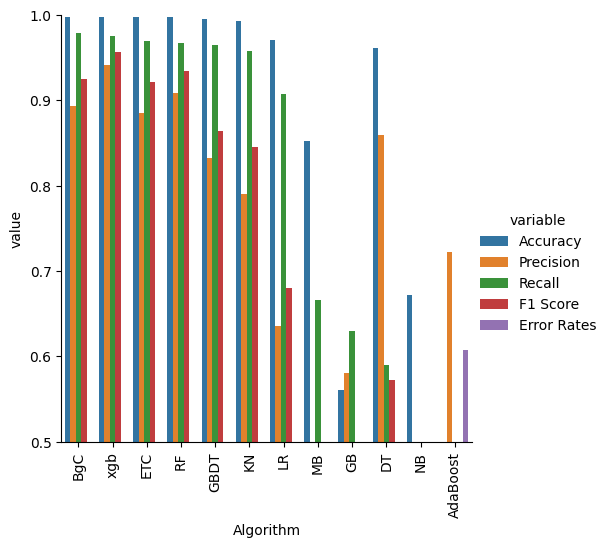

In [69]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### 6.) Model Improvement

### i.) Soft Voting

#### 1.)Training Soft Voting

In [70]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
voting = VotingClassifier(estimators=[('RF', rfc), ('BgC', bc), ('ETC', etc), ('XGB', xgb)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=N...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=2, ...))],
                 voting='soft')

In [71]:
y_train_pred = voting.predict(X_train)
confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion)

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')
error_rate = np.sum(y_train_pred != y_train) / len(y_train)

    # Print metrics
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Training F1 Score:", f1)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[14425     0     0     0     0    37     0     0]
 [    0 14632     0     0     0     0     0     0]
 [    0     0 97547     0     0     0     0     0]
 [    0     0     0 42342     0     0     0     0]
 [    0     0     0     0 54200     1     0     0]
 [   13     0     0     1     0 78330     0     0]
 [    0     0     0     0     0     0 14632     0]
 [    0     0     0     0     0     0     0 14592]]
Training Accuracy: 0.99984278250774
Training Precision: 0.9998238862294098
Training Recall: 0.9996555527623534
Training F1 Score: 0.9997396304802513
Error Rate: 0.00015721749226006192


### 2.)Testing Soft Voting

In [72]:
y_pred = voting.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("F1 Score",f1_score(y_test, y_pred, average='macro'))
error_rate = np.sum(y_pred != y_test) / len(y_test)
print("Error Rate:", error_rate)

Confusion Matrix:
 [[  234     0     0     0     0    45     1     1]
 [    0    33     0     0     0     0     0     0]
 [    0     0 24387     0     1     1     0     0]
 [    1     0     0 10716     1     5     0     0]
 [    0     0     0     1 13678     6     0     0]
 [   79     0     1    10     2 19534     0     0]
 [    0     0     0     0     0     0     3     0]
 [    1     0     0     0     0     0     0    37]]
Accuracy 0.9977318328535287
Precision 0.9327841307041006
Recall 0.9750613061626101
F1 Score 0.9513699981366504
Error Rate: 0.0022681671464712554


### 2.) Stacking

### Training

In [ ]:
# Applying stacking
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
estimators=[('RF', rfc), ('BgC', bc), ('ETC', etc), ('XGB', xgb)]
final_estimator=RandomForestClassifier()

stacks = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

stacks.fit(X_train_scaled,y_train)

y_train_pred = clf.predict(X_train_scaled)

confusion = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", confusion)

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, average='macro')
recall = recall_score(y_train, y_train_pred, average='macro')
f1 = f1_score(y_train, y_train_pred, average='macro')
error_rate = np.sum(y_train_pred != y_train) / len(y_train)

    # Print metrics
print("Training Accuracy:", accuracy)
print("Training Precision:", precision)
print("Training Recall:", recall)
print("Training F1 Score:", f1)
print("Error Rate:", error_rate)

#### Stacking Tetsing

In [ ]:
y_pred = stacks.predict(X_test_scaled)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred, average='macro'))
print("Recall",recall_score(y_test, y_pred, average='macro'))
print("F1 Score",f1_score(y_test, y_pred, average='macro'))
error_rate = np.sum(y_pred != y_test) / len(y_test)
print("Error Rate:", error_rate)